In [1]:
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np

import torch
from torchvision import datasets, transforms

---

In [2]:
mnist = datasets.MNIST(root='.',
                       train=False,
                       transform=transforms.ToTensor(),
                       download=True)

In [3]:
dado, label = mnist[0]
print(type(dado), type(label))

<class 'torch.Tensor'> <class 'int'>


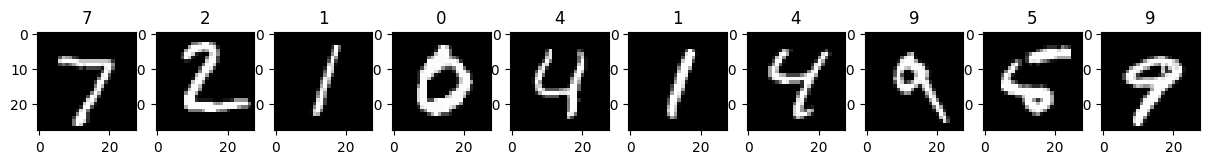

In [4]:
fig, axs = plt.subplots(1, 10, figsize=(15,4))
for i in range(10):
    dado, rotulo = mnist[i]
    axs[i].imshow(dado[0], cmap='gray')
    axs[i].set_title(str(rotulo))

---

In [5]:
voc = datasets.VOCDetection(root='.',
                            image_set='train',
                            download=True,
                            transform=transforms.ToTensor())

Using downloaded and verified file: ./VOCtrainval_11-May-2012.tar
Extracting ./VOCtrainval_11-May-2012.tar to .


In [6]:
dado, rotulo = voc[0]
print(type(dado), type(rotulo))

<class 'torch.Tensor'> <class 'dict'>


In [7]:
print(dado.size())

torch.Size([3, 442, 500])


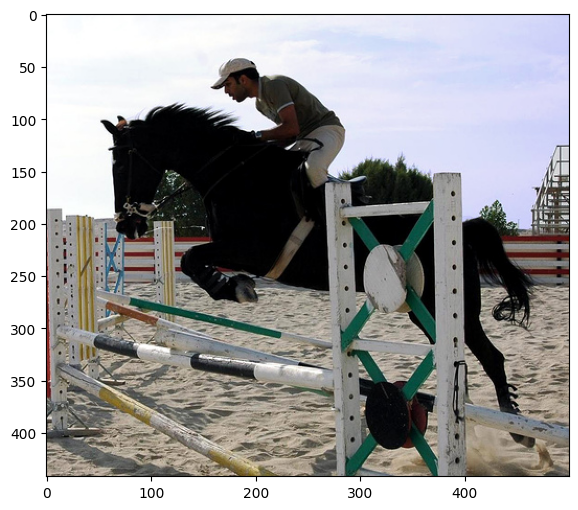

In [8]:
dado = dado.permute(1,2,0)
plt.figure(figsize=(8,6))
plt.imshow(dado)

In [9]:
rotulo

{'annotation': {'folder': 'VOC2012',
  'filename': '2008_000008.jpg',
  'source': {'database': 'The VOC2008 Database',
   'annotation': 'PASCAL VOC2008',
   'image': 'flickr'},
  'size': {'width': '500', 'height': '442', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'horse',
    'pose': 'Left',
    'truncated': '0',
    'occluded': '1',
    'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'},
    'difficult': '0'},
   {'name': 'person',
    'pose': 'Unspecified',
    'truncated': '1',
    'occluded': '0',
    'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'},
    'difficult': '0'}]}}

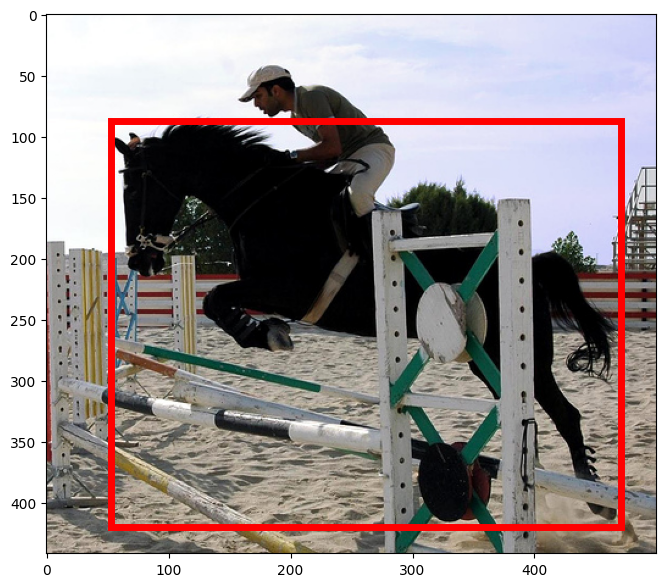

In [10]:
bbox = rotulo['annotation']['object'][0]['bndbox']
xmax = int(bbox['xmax'])
xmin = int(bbox['xmin'])
ymax = int(bbox['ymax'])
ymin = int(bbox['ymin'])

fig, ax = plt.subplots(figsize=(8, 7))
plt.imshow(dado)

rect = patches.Rectangle((xmin, ymin), xmax-xmin , ymax-ymin, fill=False, linewidth=5, edgecolor='r')
ax.add_patch(rect)

plt.show()

---

In [11]:
vocs = datasets.VOCSegmentation(root='.',
                            image_set='val',
                            download=False,
                            transform=transforms.ToTensor(),
                            target_transform=transforms.ToTensor())

In [12]:
dado, rotulo = vocs[0]
print(type(dado), type(rotulo))

<class 'torch.Tensor'> <class 'torch.Tensor'>


In [13]:
print(dado.size(), rotulo.size())

torch.Size([3, 366, 500]) torch.Size([1, 366, 500])


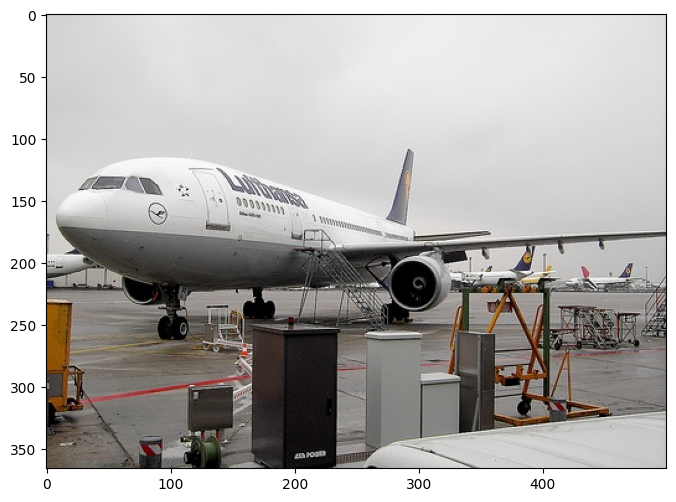

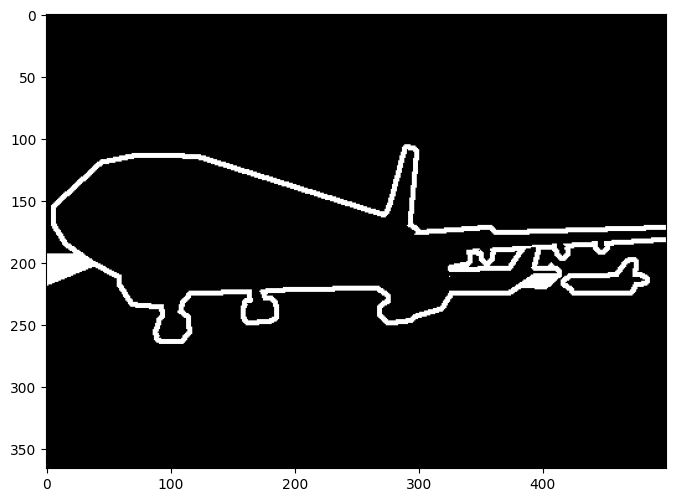

In [14]:
dado = dado.permute(1,2,0)

plt.figure(figsize=(8,6))
plt.imshow(dado)

plt.figure(figsize=(8,6))
plt.imshow(rotulo[0], cmap='gray')

---

Files already downloaded and verified
<class 'torch.Tensor'> <class 'int'>
torch.Size([3, 32, 32])


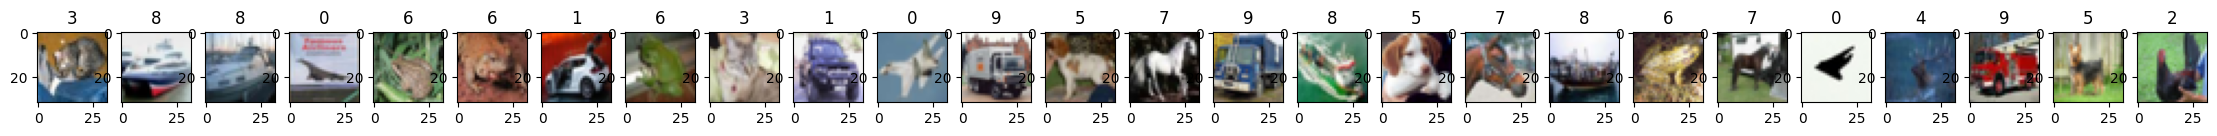

In [17]:
data = datasets.CIFAR10('./',
                      train=False,
                      download=True,
                      transform=transforms.ToTensor())


dado, rotulo = data[0]
print(type(dado), type(rotulo))

# Channel First: Padrão do torch
print(dado.size()) # C x H x W

fig, axs = plt.subplots(1,26, figsize=(28, 4))

for i in range(26):
  dado, rotulo = data[i]
  # Lembre-se que imagens são carregadas na dimensão C x H x W
  # é preciso permutar as dimensões para plot.
  axs[i].imshow(dado.permute(1,2,0))
  axs[i].set_title(str(rotulo))

plt.show()